# Exercise 3 | TKO_7092 Evaluation of Machine Learning Methods 2023
## deadline: 15.2.2023 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Peppi-Lotta Saari

Student number: 517334

Student email: plsaar@utu.fi

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=5 (5NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 5-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 5NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 5NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals from 0m to 250m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. Remember to also take advantage of earlier exercises (e.g. C-index). For the 5-nearest neighbor and Euclidean distance calculation you can use third-party libraries (e.g. Scikit-learn) if you want. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [2]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import math
from datetime import datetime
from tqdm import tqdm
from matplotlib import pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Read in the datasets

In [4]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).
#
# Note that the coordinates are in EUREF-TM35FIN format, so you 
# can use the Euclidean distance to calculate the distance between two coordinate points.  

input_data = pd.read_csv('./input.csv', header=None)  
input_df = pd.DataFrame(input_data)
print(input_df.shape)
display(input_df.head())

output_data = pd.read_csv('./output.csv', header=None)  
output_df = pd.DataFrame(output_data)
print(output_df.shape)
display(output_df.head())

coordinates_data = pd.read_csv('./coordinates.csv', header=None)  
coordinates_df = pd.DataFrame(coordinates_data)
print(coordinates_df.shape)
display(coordinates_df.head())

(1691, 75)


,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.053196,-0.219296,0.210020,0.704425,0.339477,0.412638,0.331074,-0.034411,-0.184481,0.307345,...,0.219541,0.539119,-0.645254,-0.519918,-0.447089,0.554097,0.087285,-0.109193,-0.913639,-0.461479
1,-0.632098,-0.682804,-0.285522,-0.369542,-0.138305,2.489725,2.051755,-0.034411,-0.246906,-0.226797,...,0.219541,-0.169259,-0.645254,2.475438,-0.447089,-0.288927,-0.035919,-1.481978,-1.087664,-0.461479
2,-0.674980,-0.597421,-0.568689,-0.983237,-0.828435,-0.496087,-0.451053,-0.034411,-0.324938,-0.627405,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.375320,-0.159124,0.349947,0.134707,-0.809315
3,-0.331927,-0.154649,1.307292,0.090730,0.419107,1.061728,0.956776,-0.034411,-0.301529,-0.360333,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.383278,0.703308,0.467238,0.107450,-0.832933
4,-0.610657,-0.673046,-0.161636,-0.522966,-0.377196,0.672274,0.800351,-0.034411,-0.363954,-0.961244,...,-1.047724,-0.877636,2.098494,0.977760,1.960643,-0.296657,0.087285,-0.333328,-0.636876,-0.542584


(1691, 1)


,0
0,5.8359
1,6.2592
2,6.9041
3,6.2065
4,7.0642


(1691, 2)


,0,1
0,459140.0,7524200.0
1,461590.0,7549000.0
2,462040.0,7549300.0
3,462040.0,7549300.0
4,462130.0,7549400.0


### Standardization of the predictor features (input.csv)

In [5]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this. 

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#scale
scaler = StandardScaler()
scale = scaler.fit_transform(input_df) 

#back to dataframe 
input_scaled = pd.DataFrame(scale)

#display the dataframe we got with scipys method
display(input_scaled.head())

# scaling with scipys method doesn't seem to have any affect. I guess it's because the standard diviation is so close to 1 and mean to 0

#####################################################################
# scale manually 
input_scaled_m = (input_df - input_df.mean()) / input_df.std()
display(input_scaled_m.head())

####################################################################
print('Standard diviation of original data', input_df.std())
print('Mean of original data', input_df.mean())
print(input_scaled_m.std())
print(input_scaled_m.mean())

# Scaling by hand had more of and effect so i'll be using a dataframe made with scaling by hand -> input_scaled_m

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.053196,-0.219296,0.210020,0.704425,0.339477,0.412638,0.331074,-0.034411,-0.184481,0.307345,...,0.219541,0.539119,-0.645254,-0.519918,-0.447089,0.554097,0.087285,-0.109193,-0.913639,-0.461479
1,-0.632098,-0.682804,-0.285522,-0.369542,-0.138305,2.489725,2.051755,-0.034411,-0.246906,-0.226797,...,0.219541,-0.169259,-0.645254,2.475438,-0.447089,-0.288927,-0.035919,-1.481978,-1.087664,-0.461479
2,-0.674980,-0.597421,-0.568689,-0.983237,-0.828435,-0.496087,-0.451053,-0.034411,-0.324938,-0.627405,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.375320,-0.159124,0.349947,0.134707,-0.809315
3,-0.331927,-0.154649,1.307292,0.090730,0.419107,1.061728,0.956776,-0.034411,-0.301529,-0.360333,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.383278,0.703308,0.467238,0.107450,-0.832933
4,-0.610657,-0.673046,-0.161636,-0.522966,-0.377196,0.672274,0.800351,-0.034411,-0.363954,-0.961244,...,-1.047724,-0.877636,2.098494,0.977760,1.960643,-0.296657,0.087285,-0.333328,-0.636876,-0.542584


,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.053181,-0.219231,0.209958,0.704217,0.339376,0.412516,0.330976,-0.034401,-0.184426,0.307254,...,0.219476,0.538960,-0.645063,-0.519764,-0.446957,0.553933,0.087259,-0.109161,-0.913369,-0.461343
1,-0.631911,-0.682602,-0.285437,-0.369433,-0.138264,2.488989,2.051148,-0.034401,-0.246833,-0.226730,...,0.219476,-0.169209,-0.645063,2.474706,-0.446957,-0.288841,-0.035909,-1.481540,-1.087343,-0.461343
2,-0.674780,-0.597244,-0.568521,-0.982946,-0.828190,-0.495940,-0.450920,-0.034401,-0.324842,-0.627219,...,-1.047414,-0.877377,-0.645063,-0.519764,-0.446957,-0.375210,-0.159077,0.349843,0.134667,-0.809076
3,-0.331829,-0.154603,1.306906,0.090703,0.418983,1.061414,0.956493,-0.034401,-0.301439,-0.360227,...,-1.047414,-0.877377,-0.645063,-0.519764,-0.446957,-0.383164,0.703100,0.467100,0.107418,-0.832687
4,-0.610477,-0.672847,-0.161588,-0.522811,-0.377085,0.672075,0.800114,-0.034401,-0.363847,-0.960959,...,-1.047414,-0.877377,2.097873,0.977471,1.960064,-0.296569,0.087259,-0.333230,-0.636687,-0.542423


Standard diviation of original data 0     1.000296
1     1.000296
2     1.000296
3     1.000296
4     1.000296
        ...   
70    1.000296
71    1.000296
72    1.000296
73    1.000296
74    1.000296
Length: 75, dtype: float64
Mean of original data 0     1.344611e-16
1     1.008458e-16
2     3.361527e-17
3     4.201909e-17
4    -1.764802e-16
          ...     
70   -8.336587e-15
71    1.008458e-16
72   -1.512687e-16
73    1.832032e-15
74    3.277489e-16
Length: 75, dtype: float64
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
70    1.0
71    1.0
72    1.0
73    1.0
74    1.0
Length: 75, dtype: float64
0    -3.361527e-17
1     0.000000e+00
2     5.042290e-17
3    -5.882672e-17
4     2.100954e-17
          ...     
70    0.000000e+00
71   -8.403817e-18
72    1.680763e-17
73   -1.680763e-17
74    8.403817e-18
Length: 75, dtype: float64


In [12]:
features = input_scaled_m.copy()
labels = output_df[0]

### Functions

In [13]:
def getDistance(current_sample, compared_sample):
    
    x1 = coordinates_df.iloc[current_sample][0]
    y1 = coordinates_df.iloc[current_sample][1]
    
    x2 = coordinates_df.iloc[compared_sample][0]
    y2 = coordinates_df.iloc[compared_sample][1]
    
    return math.sqrt( (x2-x1)**2 + (y2-y1)**2 )

In [17]:
# distance 
print('start, ', datetime.now())
distances = pd.DataFrame(columns=range(features.shape[0]), index=range(features.shape[0]))
    
for i in tqdm(range(input_df.shape[0])):
    for j in range(input_df.shape[0]):

        dist = getDistance(i, j)
        distances[i][j] = dist

distances    
print('done, ', datetime.now())

100%|████████████████████████████████████████████████████████████████████████████| 1691/1691 [1:09:56<00:00,  2.48s/it]


,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
0,0.0,24920.724307,25266.974492,25266.974492,25376.762993,23400.931605,23307.080469,17516.894702,17519.728879,17545.47235,...,57171.00314,57343.296034,58139.488302,58243.578187,60492.515239,59300.084317,64207.853102,64022.749863,64426.311395,64580.185816
1,24920.724307,0.0,540.832691,540.832691,672.011905,1712.337584,1820.027472,8384.51549,8387.514531,8414.992573,...,49110.101812,49492.525698,50040.399679,50952.084354,52183.79921,52284.534042,53787.441843,53794.144663,53906.568245,54039.068275
2,25266.974492,540.832691,0.0,0.0,134.53624,1906.724941,2009.975124,8551.81852,8554.23287,8576.456145,...,48661.644033,49046.524851,49590.100827,50512.081723,51727.830034,51846.697098,53302.761655,53311.748236,53420.610255,53552.744094
3,25266.974492,540.832691,0.0,0.0,134.53624,1906.724941,2009.975124,8551.81852,8554.23287,8576.456145,...,48661.644033,49046.524851,49590.100827,50512.081723,51727.830034,51846.697098,53302.761655,53311.748236,53420.610255,53552.744094
4,25376.762993,672.011905,134.53624,134.53624,0.0,2001.224625,2102.878979,8627.914,8630.202779,8651.294701,...,48572.573537,48958.27305,49500.404039,50425.807877,51636.197575,51761.125374,53200.978374,53210.803414,53318.354251,53450.351729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,59300.084317,52284.534042,51846.697098,51846.697098,51761.125374,51640.87141,51600.387595,50112.649102,50102.723479,50013.394206,...,3619.336956,3094.769781,3048.62264,1379.275172,3101.032086,0.0,8965.288618,8478.354793,9272.842067,9387.672768
1687,64207.853102,53787.441843,53302.761655,53302.761655,53200.978374,53416.836297,53393.56141,52987.473992,52977.883121,52891.572107,...,8259.44308,8425.888677,7554.078369,8832.326987,5914.862636,8965.288618,0.0,504.876222,310.483494,447.213595
1688,64022.749863,53794.144663,53311.748236,53311.748236,53210.803414,53407.809354,53383.541471,52915.424027,52905.806865,52819.258798,...,7871.727892,8017.986031,7140.0,8372.628022,5440.854712,8478.354793,504.876222,0.0,800.062498,909.34042
1689,64426.311395,53906.568245,53420.610255,53420.610255,53318.354251,53544.841021,53522.122529,53149.788334,53140.211705,53054.029065,...,8558.621384,8729.627713,7859.19207,9142.778571,6224.757023,9272.842067,310.483494,800.062498,0.0,156.204994


In [18]:
# Include here all the functions (for example the C-index-function) that you need in order to implement the task.
# taken from first week's assignment
def cindex(true_labels, pred_labels):
    n = 0
    h_num = 0 
    for i in range(0, len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1, len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    cindx =  h_num/n
    return cindx

In [27]:
# make test/train splits for leave-one-out
# drop samples that are closer than the given distance
def loo_split(d, sample): 
    
    # get indexis of samples within drop distance
    drop_inds = distances[(distances[sample] <= d)].index
    
    # test sets
    test_features = features.iloc[[sample]]
    test_labels = labels.iloc[sample]
    
    #train sets
    train_features = features.drop(index=drop_inds)
    train_labels = labels.drop(index=drop_inds)
    
    return  test_features, train_features, test_labels, train_labels

In [41]:
# calculate c_index for predictions
def loo_predictions():
    
    samples = features.shape[0]
    
    cols = ['prediction_' + str(i) for i in range(0, 251, 10)]
    predictions_df = pd.DataFrame(columns=cols, index=range(samples))
    
    #loop trough all samples
    for sample in tqdm(range(0, samples), total = samples, desc ="Progress: "):
        
        predictions = []
        for d in range(0, 251, 10):
        
            #make split
            test_features, train_features, test_labels, train_labels = loo_split(d, sample)

            # k-nn with 5 neigbours
            model = KNeighborsRegressor(n_neighbors=5)

            # Train the model using the training sets
            model.fit(train_features, train_labels)

            #Predict Output
            predicted = model.predict(test_features)
            
            col = 'prediction_' + str(d)
            predictions_df[col][sample] = predicted[0]
    
    return predictions_df

### Results for spatial leave-one-out cross-validation with 5-nearest neighbor regression model

In [42]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 5-nearest neighbor regression model and visualize the results as 
print('start, ', datetime.now())
predictions = loo_predictions()
print('done, ', datetime.now())

start,  2023-03-01 18:30:56.501404


Progress: 100%|████████████████████████████████████████████████████████████████████| 1691/1691 [17:36<00:00,  1.60it/s]

done,  2023-03-01 18:48:33.141785


In [43]:
predictions

,prediction_0,prediction_10,prediction_20,prediction_30,prediction_40,prediction_50,prediction_60,prediction_70,prediction_80,prediction_90,...,prediction_160,prediction_170,prediction_180,prediction_190,prediction_200,prediction_210,prediction_220,prediction_230,prediction_240,prediction_250
0,6.88912,6.88912,6.88912,6.88912,6.88912,6.88912,6.88912,6.88912,6.88912,6.88912,...,6.88912,6.88912,6.88912,6.88912,6.88912,6.88912,6.88912,6.88912,6.88912,6.88912
1,6.749,6.749,6.749,6.749,6.749,6.749,6.749,6.749,6.749,6.749,...,6.749,6.749,6.749,6.749,6.749,6.749,6.749,6.749,6.749,6.749
2,6.03864,6.03864,6.03864,6.03864,6.03864,6.03864,6.03864,6.03864,6.03864,6.03864,...,6.03864,6.03864,6.03864,6.03864,6.03864,6.03864,6.03864,6.03864,6.03864,6.03864
3,5.68956,5.68956,5.68956,5.68956,5.68956,5.68956,5.68956,5.68956,5.68956,5.68956,...,5.68956,5.68956,5.68956,5.68956,5.68956,5.68956,5.68956,5.68956,5.68956,5.68956
4,6.70308,6.70308,6.70308,6.70308,6.70308,6.70308,6.70308,6.70308,6.70308,6.70308,...,6.70308,6.70308,6.70308,6.70308,6.70308,6.70308,6.70308,6.70308,6.70308,6.70308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,5.90756,5.90756,5.90756,5.90756,5.90756,5.90756,5.90756,5.90756,5.90756,5.90756,...,5.90756,5.90756,5.90756,5.90756,5.90756,5.90756,5.90756,5.90756,5.90756,5.90756
1687,6.2674,6.2674,6.2674,6.2674,6.2674,6.2674,6.2674,6.2674,6.2674,6.2674,...,6.2674,6.2674,6.2674,6.2674,6.2674,6.2674,6.2674,6.2674,6.2674,6.2674
1688,6.06188,6.06188,6.06188,6.06188,6.06188,6.06188,6.06188,6.06188,6.06188,6.06188,...,6.06188,6.06188,6.06188,6.06188,6.06188,6.06188,6.06188,6.06188,6.06188,6.06188
1689,6.1752,6.1752,6.1752,6.1752,6.1752,6.1752,6.1752,6.1752,6.1752,6.1752,...,6.1752,6.1752,6.1752,6.1752,6.1752,6.1752,6.1752,6.1752,6.1752,6.1752


In [44]:
c_inds = pd.DataFrame(columns=['drop_distance', 'c_index'])

for d in tqdm(range(0, 251, 10), total = 26, desc ="Progress: "):
    
    column = 'prediction_' + str(d)
    c_index = cindex(labels, predictions[column])
    row = [d, c_index]
    c_inds.loc[len(c_inds.index)] = row
    
print('done')

Progress: 100%|████████████████████████████████████████████████████████████████████████| 26/26 [05:55<00:00, 13.68s/it]

done


In [45]:
c_inds

,drop_distance,c_index
0,0.0,0.712899
1,10.0,0.703657
2,20.0,0.707238
3,30.0,0.705634
4,40.0,0.698284
5,50.0,0.691942
6,60.0,0.690970
7,70.0,0.686189
8,80.0,0.683503
9,90.0,0.681938


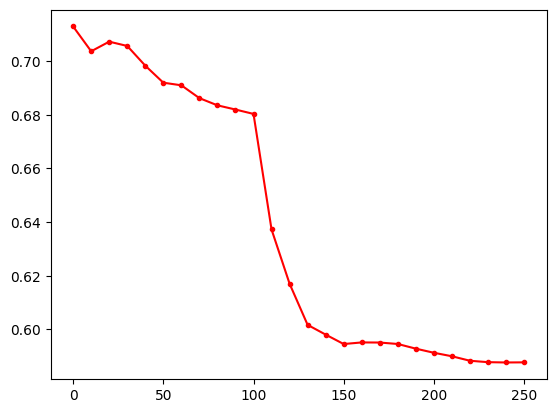

In [46]:
plt.plot(c_inds['drop_distance'], c_inds['c_index'], '.r-')

### Interpretation of the results

##### In this cell, give a brief commentary on the results, what happens to the prediction performance as the prediction distance increases?

The prediction becomes more unsertain as the distance increases. Seesm that after 100 meters the unsertainty increases a lot. I figure that as the distance grows the model hasn't seen data that is close enough to the actual datapoint to make predictions. I would say the best distance for training a model would be somewhere between 50-100 meters. 